# High-Level Feature Extraction

I use 7 different models, all pretrained on ImageNet, to extract so called high-level features from the image patches. These high-level features are stored in separate data files for each model.

## 1. Import packages and define class names

In [ ]:
import numpy as np
import os
import re
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class_names=['adenosis',
         'ductal_carcinoma',
         'fibroadenoma',
         'lobular_carcinoma',
         'mucinous_carcinoma',
         'papillary_carcinoma',
         'phyllodes_tumor',
         'tubular_adenoma']

## 2. Structure of `data/breast/40Xpatches` directory

The directory structure for the image patches is the same as for the original images.

```
data/breast/40Xpatches
├── adenosis
├── ductal_carcinoma
├── fibroadenoma
├── lobular_carcinoma
├── mucinous_carcinoma
├── papillary_carcinoma
├── phyllodes_tumor
└── tubular_adenoma
```

## 3. Define image generator for image patches and plot sample image patches

#### Define image generator

In [2]:
image_generator = ImageDataGenerator(rescale=1/255) # 1/255 for plotting

NameError: name 'ImageDataGenerator' is not defined

In [4]:
image40Xpatches = image_generator.flow_from_directory(
    os.path.join('data','breast','40Xpatches'),
    batch_size=64, 
    target_size=(230, 350), # patch size
    class_mode = 'sparse',
    shuffle=True
)

Found 7980 images belonging to 8 classes.


#### Print shape of image patches and labels

In [5]:
imgs, labels = image40Xpatches.next()
print('Images:', imgs.shape)
print('Labels:', labels.shape)

Images: (64, 230, 350, 3)
Labels: (64,)


Image patches are of size 230x350 in 3 color channels, meaning that we have 230x350x3=241'500 values for each patch.

#### Number of image patches per class for magnitude 40x

In [6]:
for i in range(8):
    lb = list(image40Xpatches.class_indices)[i]
    print(sum(image40Xpatches.labels==i), ': 40x',lb)
print(image40Xpatches.n,': Total images with magnitude 40x',)

456 : 40x adenosis
3456 : 40x ductal_carcinoma
1012 : 40x fibroadenoma
624 : 40x lobular_carcinoma
820 : 40x mucinous_carcinoma
580 : 40x papillary_carcinoma
436 : 40x phyllodes_tumor
596 : 40x tubular_adenoma
7980 : Total images with magnitude 40x


Classes are obviously still imbalanced, but we have four times more images (image patches) in each class (and in total).

#### Plot sample images patches for magnitude 40x

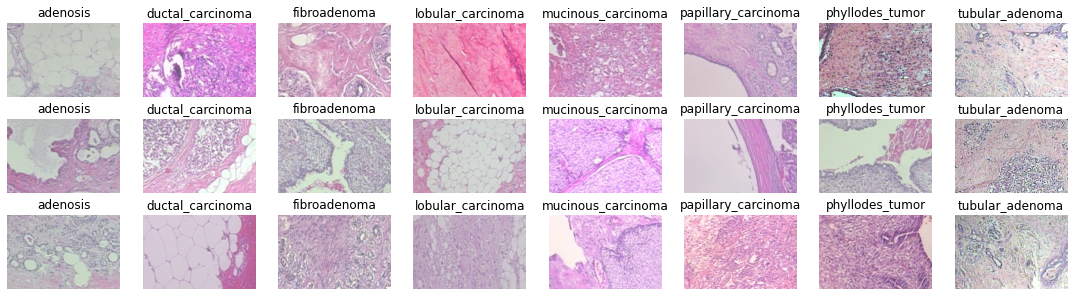

In [7]:
fig, axs = plt.subplots(3,8, figsize=(19,5))
for i in range(8):
    image40Xpatches.reset()
    while True:
        imgs, labels = image40Xpatches.next()
        imgs_cat = imgs[labels==i,:,:,:]
        labs_cat = list(image40Xpatches.class_indices)[i]
        if np.alen(imgs_cat) > 2:
            break
    for j in range(3):
        axs[j,i].imshow(imgs_cat[j,:,:,:])
        axs[j,i].set_title(labs_cat)
        axs[j,i].axis('off')

Image patches look similar to original images, at least for my eyes with any domain knowledge.

## 4. Extract highlevel-features from image patches

Here I extract highlevel-features for 7 different pretrained models. The code is structured such that firstly one have to choose a model before code below can be run.

#### Define image generator for image patches

In [1]:
image_generator = ImageDataGenerator() # Do not rescale, as preprocessing is done for each model individualy

NameError: name 'ImageDataGenerator' is not defined

In [9]:
image40Xpatches = image_generator.flow_from_directory(
    os.path.join('data','breast','40Xpatches'),
    batch_size=32, # not to big batch sizes, as memory is limited
    target_size=(230, 350),
    class_mode = 'sparse',
    shuffle=True
)

Found 7980 images belonging to 8 classes.


#### Choose one of the models

User has to choose one of the models by setting the corresponding variable to `True`.

In [5]:
isVGG16=False  # done once for the whole data set
isInceptionV3=False # done once for the whole data set
isResNet50=False # done once for the whole data set
isXception=False # done once for the whole data set
isDenseNet121=False # done once for the whole data set
isInceptionResNetV2=False # done once for the whole data set
isEfficientNetB0=True  # done once for the whole data set

#### Define pretrained model and filenames for storing the high-level features

See [VGG16](https://keras.io/api/applications/vgg/) for details.

In [4]:
if isVGG16==True:
    from tensorflow.keras.applications.vgg16 import VGG16
    from tensorflow.keras.applications.vgg16 import preprocess_input
    model = VGG16(
        weights='imagenet', 
        include_top=False, 
        input_shape=(230,350,3), 
        pooling='avg' #'max'
    )
    ffilename_prod = 'features_patches_VGG16.npz'  # file name for full data set (production)
    ffilename_dev  = 'features_patches_VGG16_dev.npz'  # file name for testing purposes (development)

See [InceptionV3](https://keras.io/api/applications/inceptionv3/) for details.

In [12]:
if isInceptionV3==True:
    from tensorflow.keras.applications.inception_v3 import InceptionV3
    from tensorflow.keras.applications.inception_v3 import preprocess_input
    model = InceptionV3(
        weights='imagenet', 
        include_top=False, 
        input_shape=(230,350,3), 
        pooling='avg' #'max'
    )
    ffilename_prod = 'features_patches_InceptionV3.npz'
    ffilename_dev  = 'features_patches_InceptionV3_dev.npz'

See [ResNet50](https://keras.io/api/applications/resnet/) for details.

In [13]:
if isResNet50==True:
    from tensorflow.keras.applications.resnet50 import ResNet50
    from tensorflow.keras.applications.resnet50 import preprocess_input
    model = ResNet50(
        weights='imagenet', 
        include_top=False, 
        input_shape=(230,350,3), 
        pooling='avg' #'max'
    )
    ffilename_prod = 'features_patches_ResNet50.npz'
    ffilename_dev  = 'features_patches_ResNet50_dev.npz'

See [Xception](https://keras.io/api/applications/xception/) for details.

In [14]:
if isXception==True:
    from tensorflow.keras.applications.xception import Xception
    from tensorflow.keras.applications.xception import preprocess_input
    model = Xception(
        weights='imagenet', 
        include_top=False, 
        input_shape=(230,350,3), 
        pooling='avg' #'max'
    )
    ffilename_prod = 'features_patches_Xception.npz'
    ffilename_dev  = 'features_patches_Xception_dev.npz'

See [DenseNet121](https://keras.io/api/applications/densenet/) for details.

In [15]:
if isDenseNet121==True:
    from tensorflow.keras.applications.densenet import DenseNet121
    from tensorflow.keras.applications.densenet import preprocess_input
    model = DenseNet121(
        weights='imagenet', 
        include_top=False, 
        input_shape=(230,350,3), 
        pooling='avg' #'max'
    )
    ffilename_prod = 'features_patches_DenseNet121.npz'
    ffilename_dev  = 'features_patches_DenseNet121_dev.npz'

See [InceptionResNetV2](https://keras.io/api/applications/inceptionresnetv2/) for details.

In [16]:
if isInceptionResNetV2==True:
    from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
    from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input  
    model = InceptionResNetV2(
        weights='imagenet', 
        include_top=False, 
        input_shape=(230,350,3), 
        pooling='avg' #'max'
    )
    ffilename_prod = 'features_patches_InceptionResNetV2.npz'
    ffilename_dev  = 'features_patches_InceptionResNetV2_dev.npz'

2022-02-14 08:09:09.704880: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


See [EfficientNet0](https://keras.io/api/applications/efficientnet/) for details.

In [17]:
if isEfficientNetB0==True:
    from tensorflow.keras.applications.efficientnet import EfficientNetB0
    from tensorflow.keras.applications.efficientnet import preprocess_input  
    model = EfficientNetB0(
        weights='imagenet', 
        include_top=False, 
        input_shape=(230,350,3), 
        pooling='avg' #'max'
    )
    ffilename_prod = 'features_patches_EfficientNetB0.npz'
    ffilename_dev  = 'features_patches_EfficientNetB0_dev.npz' 

#### Extract high-level features

Routine to extract high-level features.

In [18]:
# reset image generator
image40Xpatches.reset()

# vars to collect results
features = []
labs = []

# set to True to go through the whole sample
PROD=False  # dev
#PROD=True   # prod

if PROD==True:
    # comupte number of batches needed to go through whole data set
    nb =   image40Xpatches.n // image40Xpatches.batch_size
    rest = image40Xpatches.n % image40Xpatches.batch_size
    add_b = 0 if rest==0 else 1
    nbatch = nb+add_b
    #nbatch = 20
else:
    nbatch = 2

for i in range(nbatch):
    print('Batch number:', i+1, ', from total batches:', nbatch)
    imgs, labels = image40Xpatches.next()
    x = preprocess_input(imgs)
    if i==0: 
        features = model.predict(x)
        labs = labels.astype(int)
    else:
        features = np.r_[features, model.predict(x)]
        labs = np.r_[labs, labels.astype(int)]

# Save features to file
# get filenames for current generator
# see https://stackoverflow.com/a/65272421
fn = []
for idx in image40Xpatches.index_array: 
    fn.append(image40Xpatches.filenames[idx])
n = np.alen(labs)
fn = fn[:n]
#fn[:5]

# combine features, labels, and filenames
features_comb = np.c_[features, labs, fn]

# save to npz file
if PROD==True:
    ffilename = ffilename_prod
else:
    ffilename = ffilename_dev

np.savez(os.path.join('data', 'HLfeatures', ffilename), features_comb)

Batch number: 1 , from total batches: 250


2022-02-14 08:09:16.729085: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Batch number: 2 , from total batches: 250
Batch number: 3 , from total batches: 250
Batch number: 4 , from total batches: 250
Batch number: 5 , from total batches: 250
Batch number: 6 , from total batches: 250
Batch number: 7 , from total batches: 250
Batch number: 8 , from total batches: 250
Batch number: 9 , from total batches: 250
Batch number: 10 , from total batches: 250
Batch number: 11 , from total batches: 250
Batch number: 12 , from total batches: 250
Batch number: 13 , from total batches: 250
Batch number: 14 , from total batches: 250
Batch number: 15 , from total batches: 250
Batch number: 16 , from total batches: 250
Batch number: 17 , from total batches: 250
Batch number: 18 , from total batches: 250
Batch number: 19 , from total batches: 250
Batch number: 20 , from total batches: 250
Batch number: 21 , from total batches: 250
Batch number: 22 , from total batches: 250
Batch number: 23 , from total batches: 250
Batch number: 24 , from total batches: 250
Batch number: 25 , 

#### Shape of extracted high-level features

In [19]:
print('Shape of features:', features.shape, '\nShape of labs:', labs.shape)

Shape of features: (7980, 1536) 
Shape of labs: (7980,)


#### Load high-level features from file, and check shape, and dtype

In [20]:
with np.load(os.path.join('data', 'HLfeatures', ffilename)) as features_npz:
    features_dict = dict(features_npz)

nf = features_dict['arr_0'].shape[1] - 2
features = features_dict['arr_0'][:,:nf].astype(float)
labs = features_dict['arr_0'][:,nf].astype(int)
fn = features_dict['arr_0'][:,-1]
print('Shape of features:', features.shape, '\nShape of labs:', labs.shape, '\nShape of filenames:', fn.shape)

Shape of features: (7980, 1536) 
Shape of labs: (7980,) 
Shape of filenames: (7980,)


In [21]:
print('dtype of features:', features.dtype, '\ndtype of labels:  ', labs.dtype)

dtype of features: float64 
dtype of labels:   int64


## 5. Load high-level features from file and check theirs shape for each model

In [23]:
ffilenames = ['features_patches_VGG16.npz',
             'features_patches_InceptionV3.npz',
             'features_patches_ResNet50.npz',
             'features_patches_Xception.npz',
             'features_patches_DenseNet121.npz',
             'features_patches_InceptionResNetV2.npz',
             'features_patches_EfficientNetB0.npz']

In [ ]:
model_str = re.sub('.*_(.*)\.npz', '\\1', ffilename)
model_str

In [ ]:
for ffilename in ffilenames:
    with np.load(os.path.join('data', 'HLfeatures', ffilename)) as features_npz:
        features_dict = dict(features_npz)

    nf = features_dict['arr_0'].shape[1] - 2
    features = features_dict['arr_0'][:,:nf].astype(float)
    labs = features_dict['arr_0'][:,nf].astype(int)
    fn = features_dict['arr_0'][:,-1]
    print('Feature`s Model:', model_str)
    print('Shape of features:', features.shape, '\nShape of labs:', labs.shape, '\nShape of filenames:', fn.shape)
    print('\n')